In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D, Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
train_path='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
test_path='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'

In [3]:
train=ImageDataGenerator( rescale=1/255.0, validation_split=0.1,).flow_from_directory(train_path, batch_size=32, target_size=(128,128), subset='training',  color_mode='rgb', class_mode='categorical', shuffle=True)

Found 63282 images belonging to 38 classes.


In [4]:
valid=ImageDataGenerator(rescale=1/255.0, validation_split=0.1,).flow_from_directory(train_path, batch_size=32, target_size=(128,128), subset='validation',  color_mode='rgb',   class_mode='categorical', shuffle=True)

Found 7013 images belonging to 38 classes.


In [5]:
test=ImageDataGenerator(rescale=1/255.0,).flow_from_directory(test_path, batch_size=32, target_size=(128,128),  color_mode='rgb',   class_mode='categorical', shuffle=True)

Found 17572 images belonging to 38 classes.


In [6]:
input_shape = (128,128, 3) 
inputs = tf.keras.Input(shape=input_shape)
print(inputs)
base_model1=tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_tensor=inputs)
base_model1.trainable=False
x=tf.keras.layers.GlobalAveragePooling2D()(base_model1.output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.5)(x)
outputs=tf.keras.layers.Dense(38,activation='softmax')(x)
model_vgg16 = tf.keras.models.Model(inputs = inputs, outputs = outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_vgg16.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])

model_vgg16.summary()


<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=None, name=keras_tensor>
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,25

 Total params: 14,791,846 (56.43 MB)

 Trainable params: 76,774 (299.90 KB)

 Non-trainable params: 14,715,072 (56.13 MB)

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [8]:
history2=model_vgg16.fit(train,epochs=10,batch_size=None,validation_data=valid,callbacks=callbacks)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729797477.090296     153 service.cc:145] XLA service 0x7fd08c007c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729797477.090378     153 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729797477.090385     153 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   2/1978 ━━━━━━━━━━━━━━━━━━━━ 2:15 69ms/step - accuracy: 0.0547 - loss: 4.4114 - precision: 0.3500 - recall: 0.0234  

I0000 00:00:1729797488.492987     153 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1978/1978 ━━━━━━━━━━━━━━━━━━━━ 405s 197ms/step - accuracy: 0.3568 - loss: 2.3691 - precision: 0.6366 - recall: 0.1658 - val_accuracy: 0.7664 - val_loss: 0.7454 - val_precision: 0.8883 - val_recall: 0.6362 - learning_rate: 0.0010
Epoch 2/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - accuracy: 0.6443 - loss: 1.1168 - precision: 0.7837 - recall: 0.5034 - val_accuracy: 0.8085 - val_loss: 0.6041 - val_precision: 0.8893 - val_recall: 0.7331 - learning_rate: 0.0010
Epoch 3/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.6765 - loss: 1.0240 - precision: 0.7987 - recall: 0.5615 - val_accuracy: 0.8203 - val_loss: 0.5694 - val_precision: 0.8961 - val_recall: 0.7455 - learning_rate: 0.0010
Epoch 4/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.6845 - loss: 0.9947 - precision: 0.7971 - recall: 0.5776 - val_accuracy: 0.8397 - val_loss: 0.5080 - val_precision: 0.9126 - val_recall: 0.7731 - learning_rate: 0.0010
Epoch 5/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/st

In [12]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

precision = history2.history['precision']
val_precision = history2.history['val_precision']

recall =history2.history['recall']
val_recall =history2.history['val_recall']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

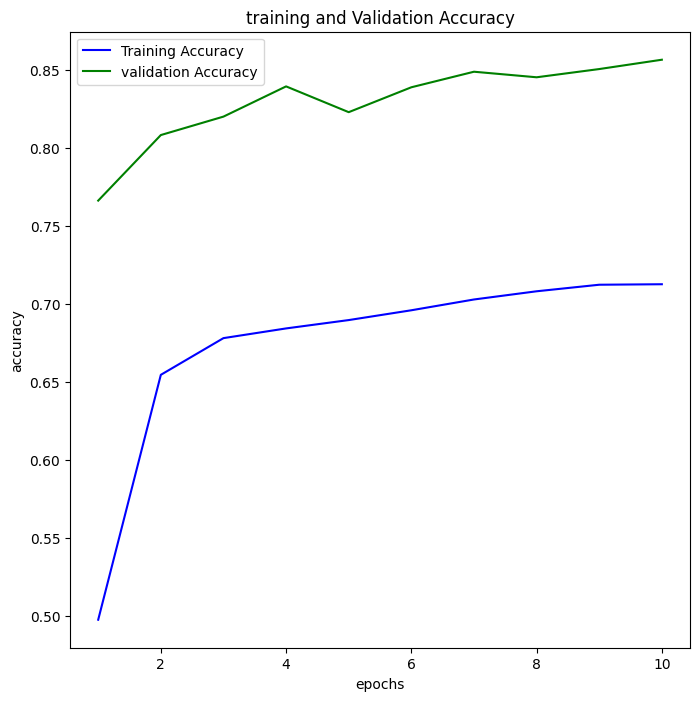

In [14]:
plt.figure(figsize=(8,8))
plt.plot(epochs,acc,color='blue',label='Training Accuracy')
plt.plot(epochs,val_acc,color='green',label='validation Accuracy')
plt.title('training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

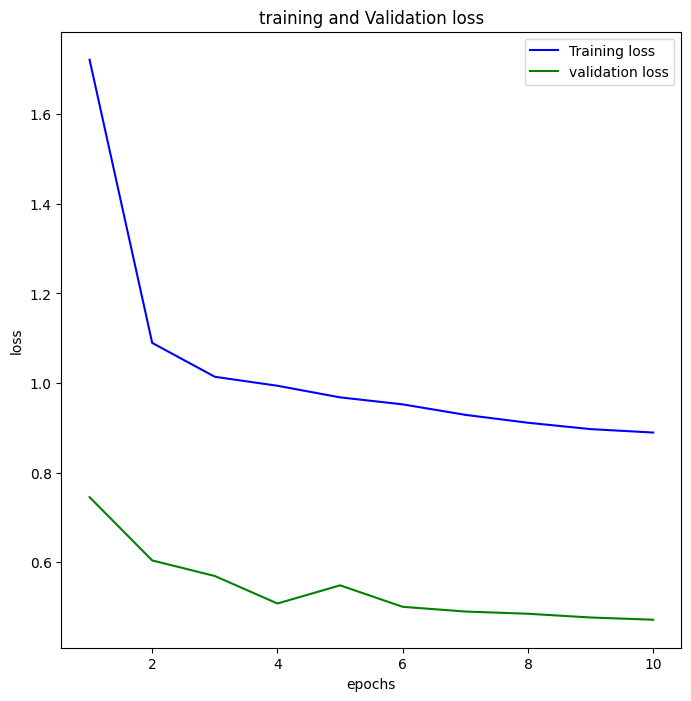

In [15]:
plt.figure(figsize=(8,8))
plt.plot(epochs,loss,color='blue',label='Training loss')
plt.plot(epochs,val_loss,color='green',label='validation loss')
plt.title('training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
results=model_vgg16.evaluate(test)
print(f'loss: {results[0]}')
print(f'accuracy: {results[1]}')
print(f'precision: {results[2]}')
print(f'recall: {results[3]}')

  2/550 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accuracy: 0.7812 - loss: 0.6405 - precision: 0.8570 - recall: 0.7031  

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 107s 195ms/step - accuracy: 0.8516 - loss: 0.4660 - precision: 0.9077 - recall: 0.7905
loss: 0.46618229150772095
accuracy: 0.8515820503234863
precision: 0.9097877144813538
recall: 0.7902913689613342
